### IMPORTS

In [63]:
import pickle
import json
import numpy as np
import matplotlib.pyplot as plt
import mplcyberpunk as mplcp
import matplotlib.font_manager as font_manager
import matplotlib.image as image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox

configs = json.load(open('Utility/configurations.json', 'r'))

# Fonts

In [64]:
race_font = font_manager.FontProperties(fname='Utility/RaceFont.ttf')
kanit_font = font_manager.FontProperties(fname='Utility/Kanit-Regular.ttf')

# Images

In [65]:
ALR_LOGO = image.imread('Utility/ALR_Logo_F1.png')
soft_tyre_img = image.imread('Utility/Soft.png')
medium_tyre_img = image.imread('Utility/Medium.png')
hard_tyre_img = image.imread('Utility/Hard.png')
intermediate_tyre_img = image.imread('Utility/Intermediate.png')
wet_tyre_img = image.imread('Utility/Wet.png')

In [66]:
time = '17h58'
driver_data = f"Results/Race/Qatar 04-10-2024 ({time})/drivers.pkl"
session_data = f"Results/Race/Qatar 04-10-2024 ({time})/session.pkl"

with open(driver_data, "rb") as f:
    driver_data = pickle.load(f)

with open(session_data, "rb") as f:
    session_data = pickle.load(f)

## Individual Graphs

In [69]:
def format_laptime(laptime):
    total_seconds = laptime / 1000
    minutes = int (total_seconds // 60)
    seconds = int(total_seconds % 60)
    milliseconds = int (laptime % 1000)
    
    time_str = f"{minutes}:{seconds:02}.{milliseconds:03}"
    return time_str

In [70]:
def get_tyre_stints(tyre_stints_visual, tyre_stints):
        tyres_used = []
        for idx, tyre in enumerate(tyre_stints_visual):
            tyres_used.extend([tyre] * tyre_stints[idx])

        return tyres_used

In [93]:
def individual_plot(lap_times, team, name, track, tyre_stints_visual, tyre_stints):

    plt.style.use('cyberpunk')

    fig, ax = plt.subplots(figsize=(14, 6))
    ax.plot(lap_times, color=configs['team_color'][team], label=name, linewidth=3.5, markeredgewidth=2, markeredgecolor='white')

    for idx, lap in enumerate(lap_times):
            
        if get_tyre_stints(tyre_stints_visual=tyre_stints_visual, tyre_stints=tyre_stints)[idx] == "Soft":
            #soft_point = ax.scatter(idx, lap, color='red', s=100, zorder=10, label='Soft')
            ab = AnnotationBbox(OffsetImage(soft_tyre_img, zoom=0.045), (idx, lap), frameon=False)
        elif get_tyre_stints(tyre_stints_visual=tyre_stints_visual, tyre_stints=tyre_stints)[idx] == "Medium":
            #medium_point = ax.scatter(idx, lap, color='yellow', s=100, zorder=10, label='Medium')
            ab = AnnotationBbox(OffsetImage(medium_tyre_img, zoom=0.045), (idx, lap), frameon=False)
        elif get_tyre_stints(tyre_stints_visual=tyre_stints_visual, tyre_stints=tyre_stints)[idx] == "Hard":
            #hard_point = ax.scatter(idx, lap, color='grey', s=100, zorder=10, label='Hard')
            ab = AnnotationBbox(OffsetImage(hard_tyre_img, zoom=0.045), (idx, lap), frameon=False)
        elif get_tyre_stints(tyre_stints_visual=tyre_stints_visual, tyre_stints=tyre_stints)[idx] == "Intermediate":
            #intermediate_point = ax.scatter(idx, lap, color='blue', s=100, zorder=10, label='Intermediate')
            ab = AnnotationBbox(OffsetImage(intermediate_tyre_img, zoom=0.045), (idx, lap), frameon=False)
        elif get_tyre_stints(tyre_stints_visual=tyre_stints_visual, tyre_stints=tyre_stints)[idx] == "Wet":
            #wet_point = ax.scatter(idx, lap, color='cyan', s=100, zorder=10, label='Wet')
            ab = AnnotationBbox(OffsetImage(wet_tyre_img, zoom=0.045), (idx, lap), frameon=False)
        
        ax.add_artist(ab)


    ax.set_title(f"grand prix: {track}\n laptimes {name}", fontdict={"color": "white", "fontsize": 16, "font": race_font})
    ax.set_xlabel("lap", fontdict={"color": "white", "fontsize": 12, "font": race_font})
    ax.set_ylabel("laptime", fontdict={"color": "white", "fontsize": 12, "font": race_font})

    ax.set_facecolor("#111111") #212121
    fig.set_facecolor("#111111") #111111

    ax.tick_params(axis='x', labelsize=10, colors='White')
    ax.tick_params(axis='y', labelsize=10, colors='White')

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('White') 
    ax.spines['right'].set_color('White')
    ax.spines['left'].set_color('White')

    old_labels = [ticks.get_text() for ticks in ax.get_yticklabels(which="major")]
    new_labels = [format_laptime(int(old_label)) for old_label in old_labels]
    old_labels = [int(old_label) for old_label in old_labels]

    ax.set_yticks(old_labels, new_labels)
    ax.set_xticks(range(len(lap_times)), range(1, len(lap_times)+1))

    plt.xticks(fontproperties=kanit_font)
    plt.yticks(fontproperties=kanit_font)

    ax.grid(which='major', color='white', linewidth=0.1)

    mplcp.make_lines_glow()
    mplcp.add_gradient_fill()

    # Add image to top-right corner
    newax = fig.add_axes([0.7, 0.81, 0.15, 0.15], anchor='NE', zorder=1)
    newax.imshow(ALR_LOGO)
    newax.axis('off')

    # for i, lap_time in enumerate(lap_times):
    #     if i > 2:
    #         ab = AnnotationBbox(OffsetImage(medium_tye_img, zoom=0.045), (i, lap_time), frameon=False)
    #     else:
    #         ab = AnnotationBbox(OffsetImage(soft_tye_img, zoom=0.045), (i, lap_time), frameon=False)
    #     ax.add_artist(ab)

    plt.show()

In [94]:
def get_lap_times(lap_times):
    return list({key: value for key, value in lap_times.items() if value != 0}.values())

In [103]:
def remove_slow_laps(laps, tyre_stints_end_laps, tyre_stints_visual, tyre_stints):

    for out_laps in tyre_stints_end_laps[:-1]:

        try:
            laps.remove(get_lap_times()[out_laps])
            laps.remove(get_lap_times()[out_laps + 1])
        except:
            laps.remove(get_tyre_stints(tyre_stints_visual, tyre_stints)[out_laps])
            laps.remove(get_tyre_stints(tyre_stints_visual, tyre_stints)[out_laps + 1])

    return laps[1:]

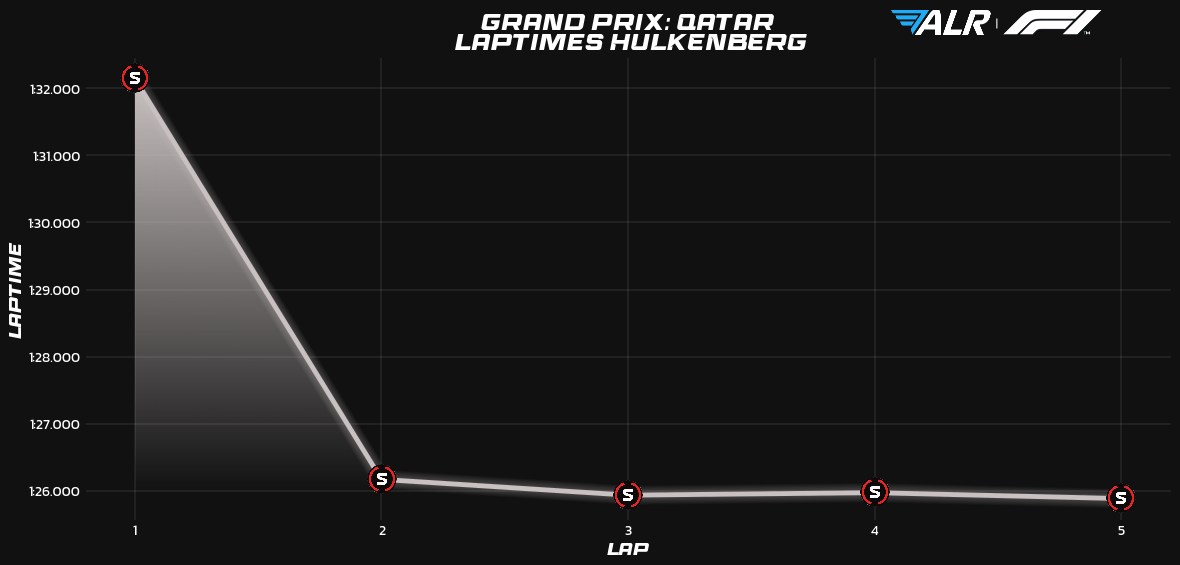

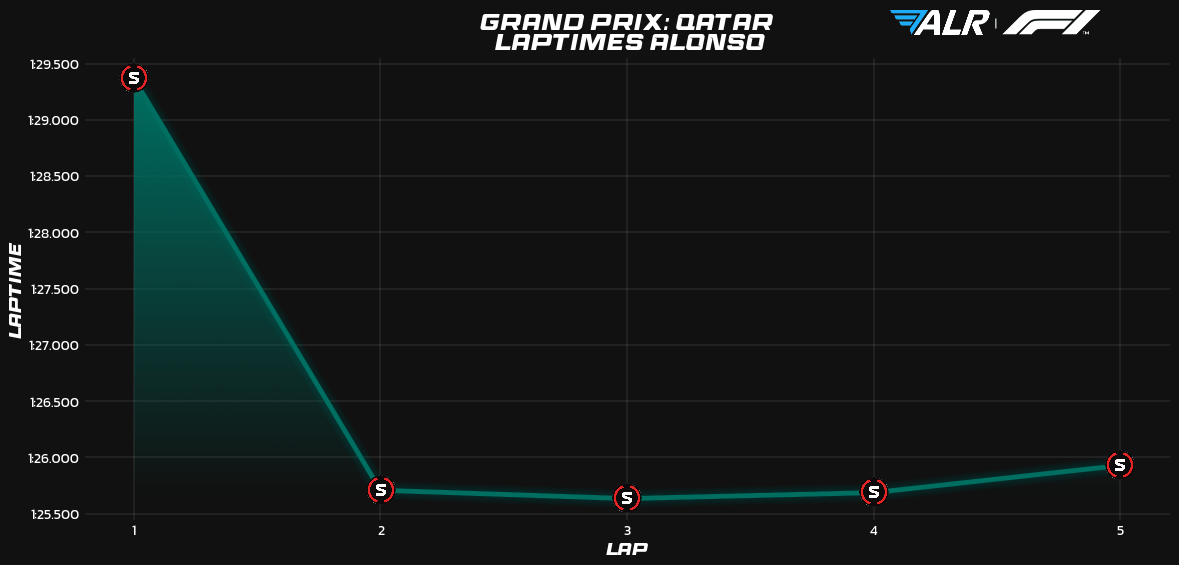

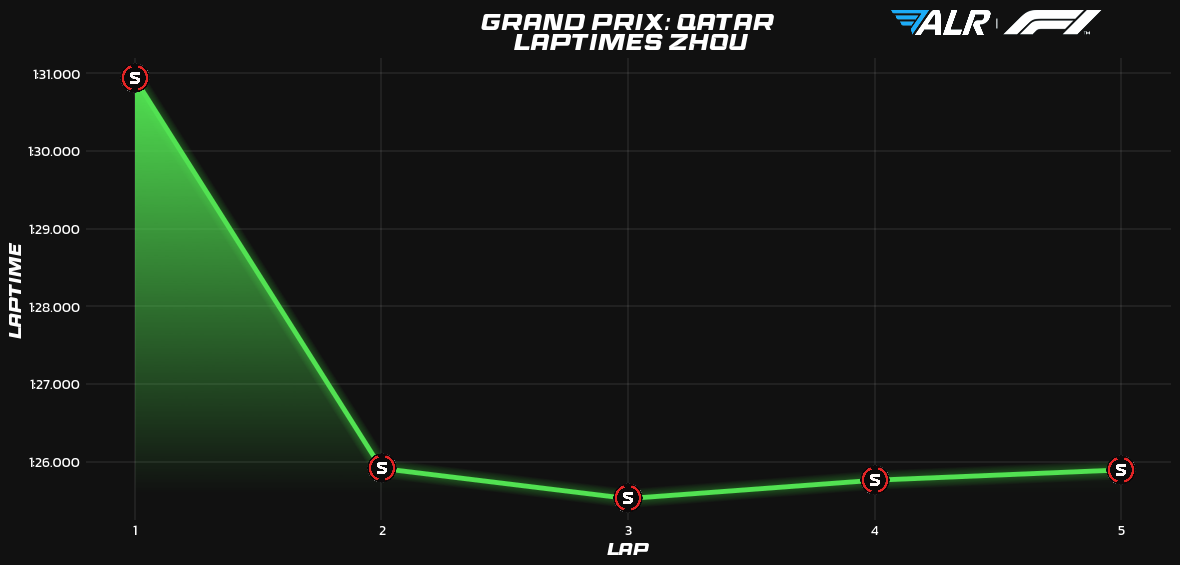

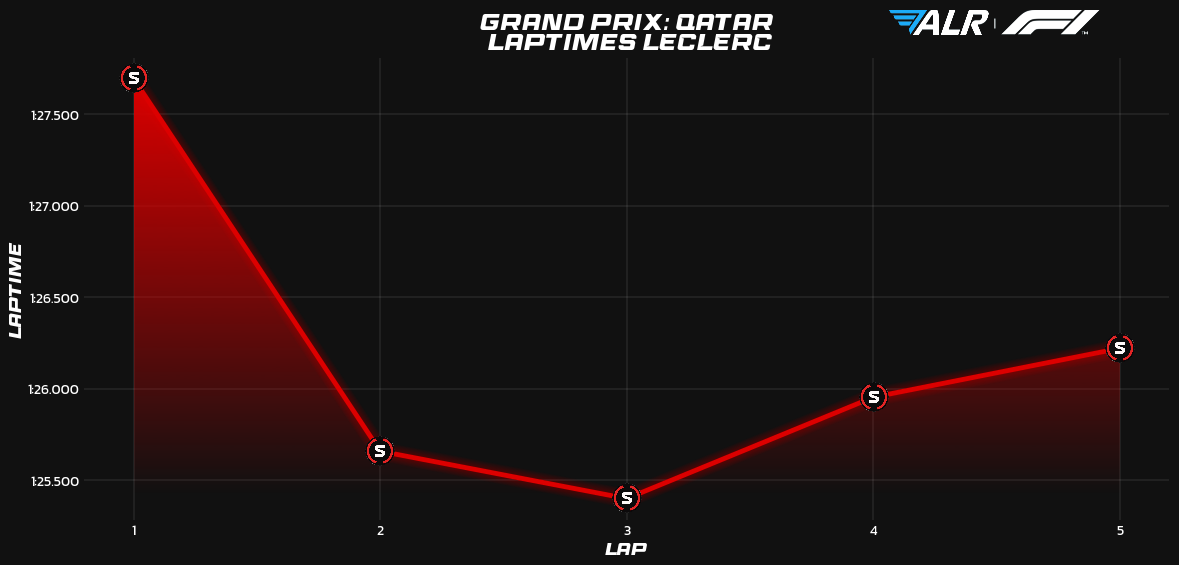

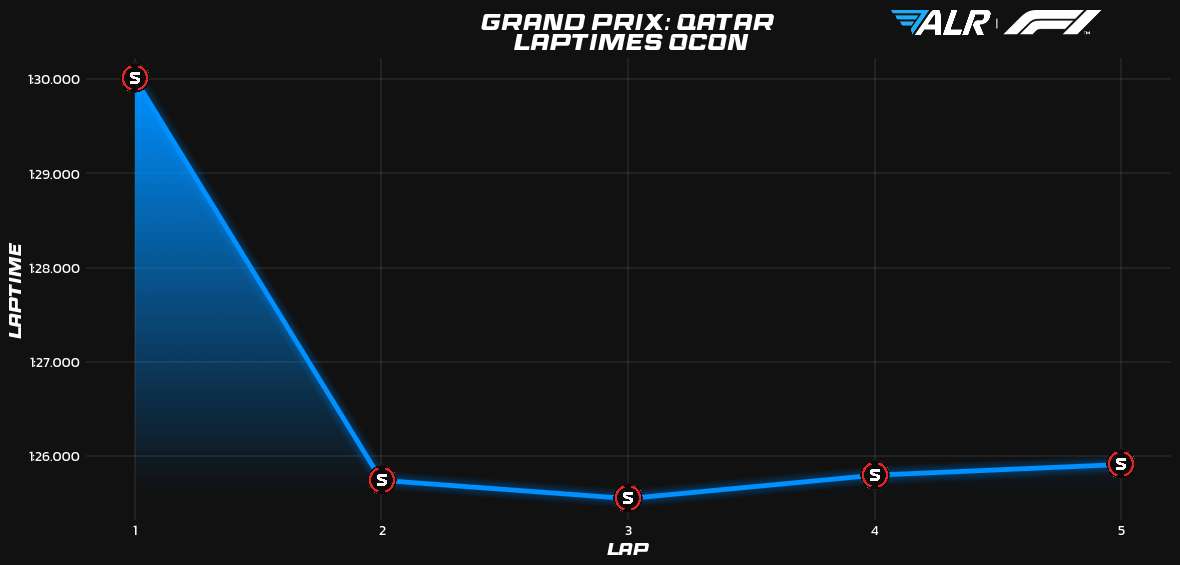

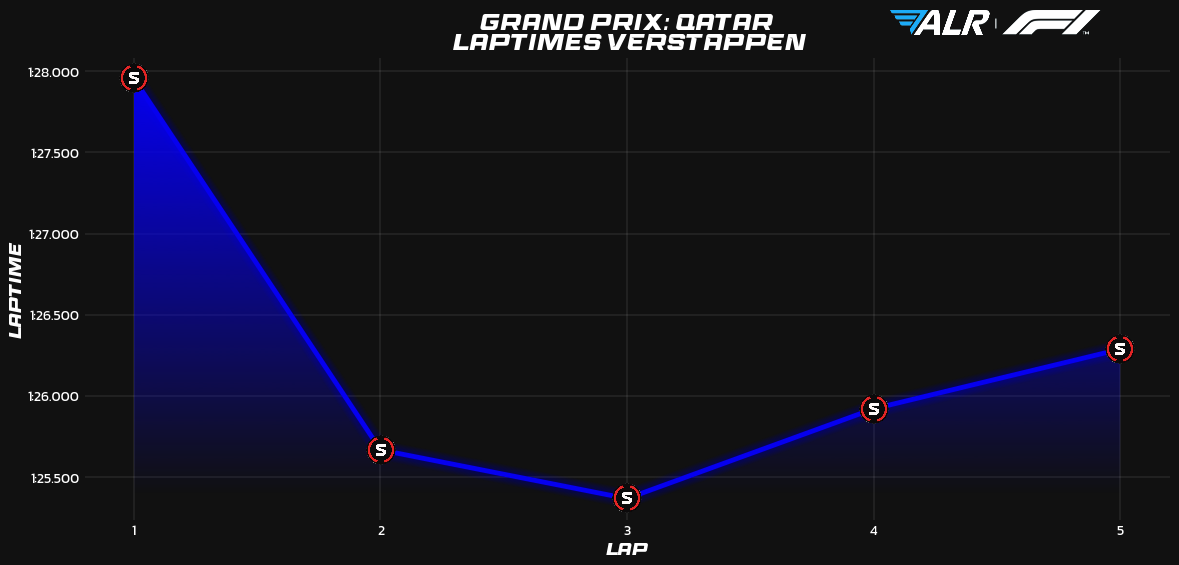

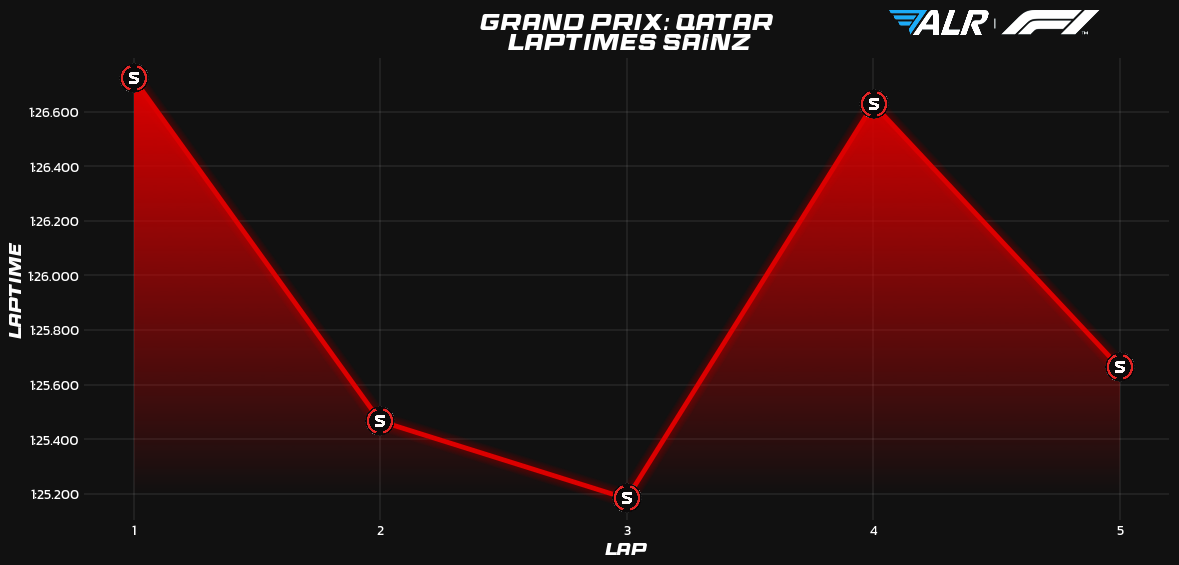

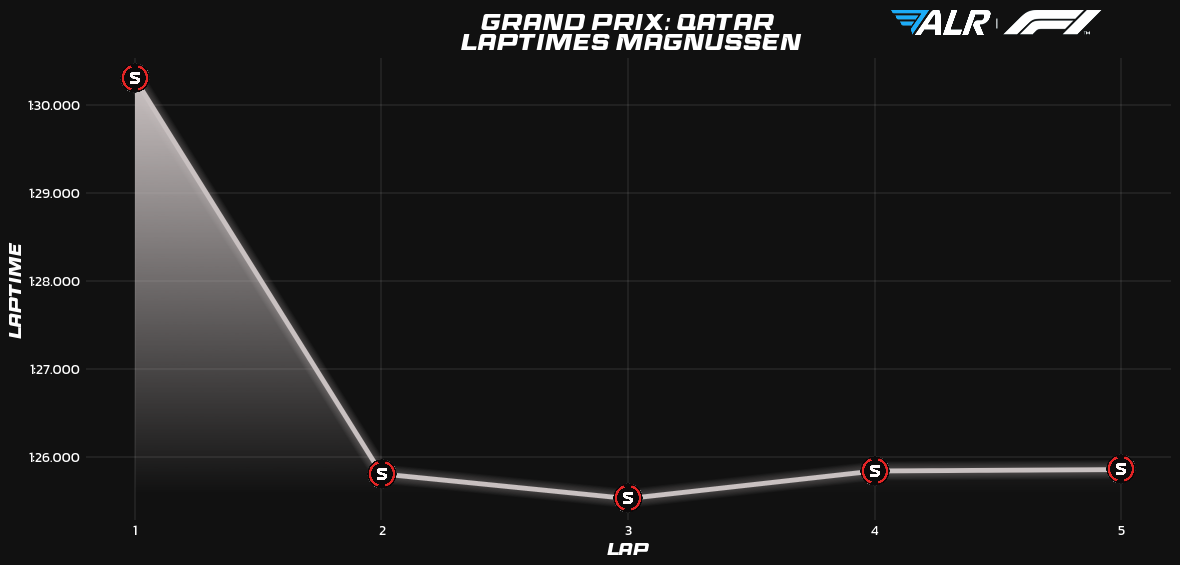

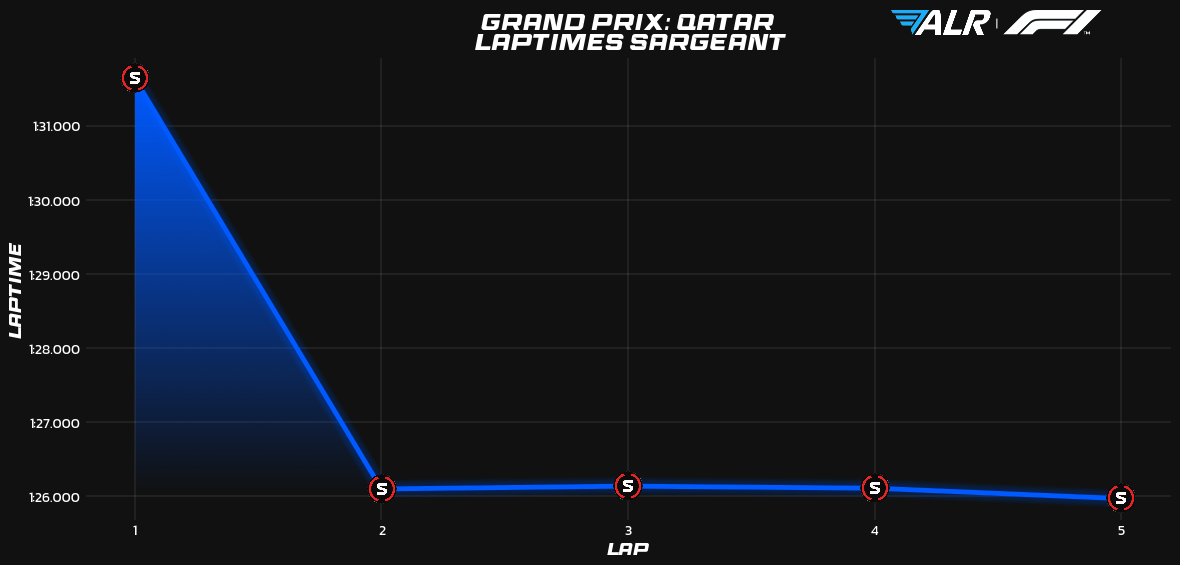

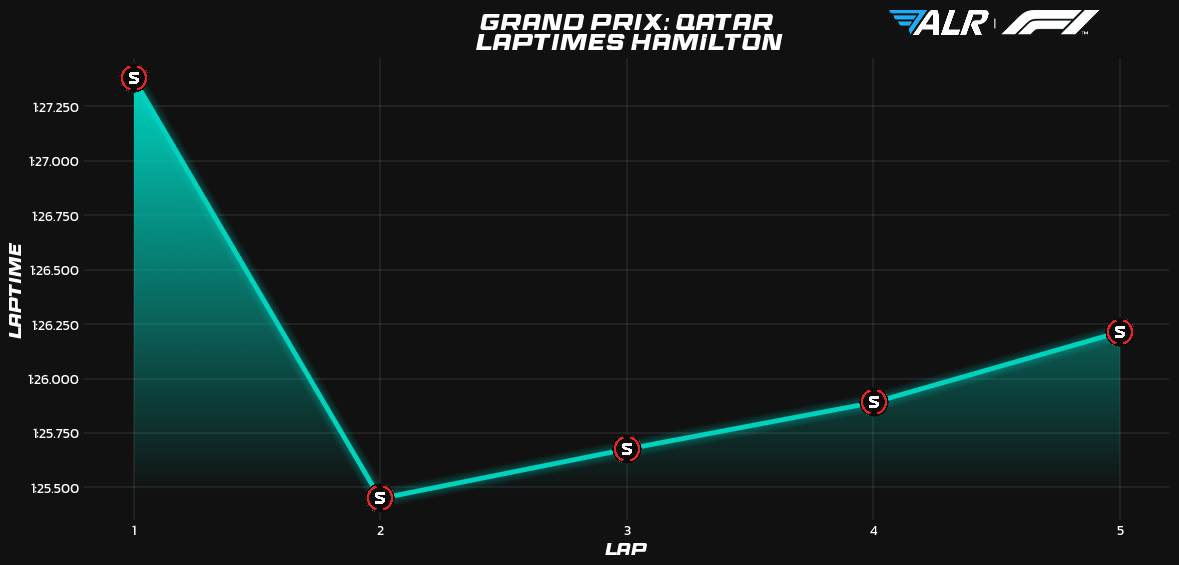

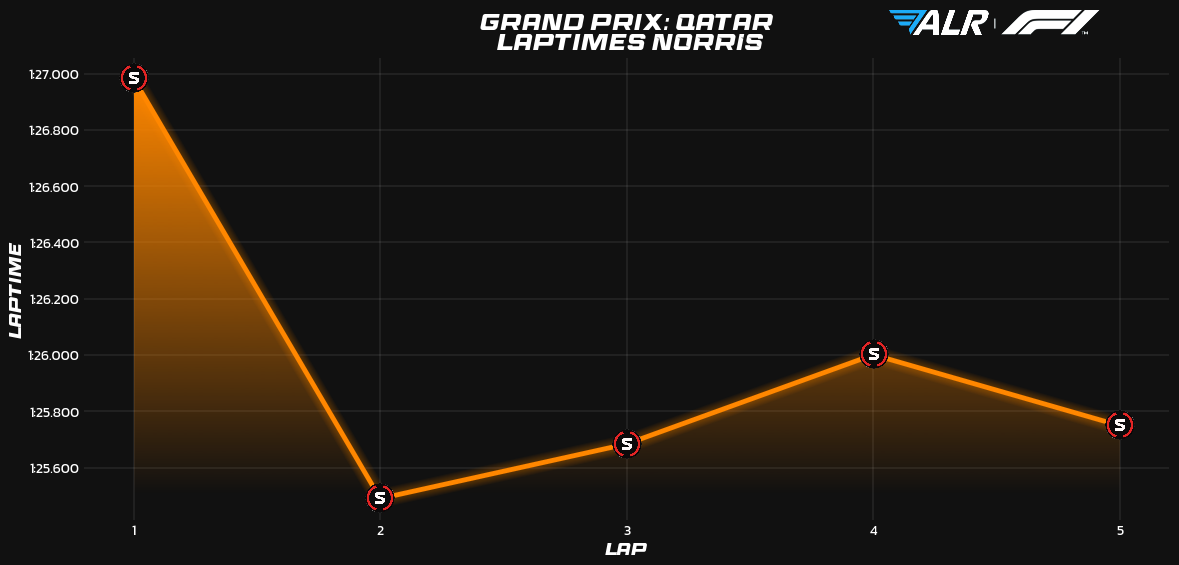

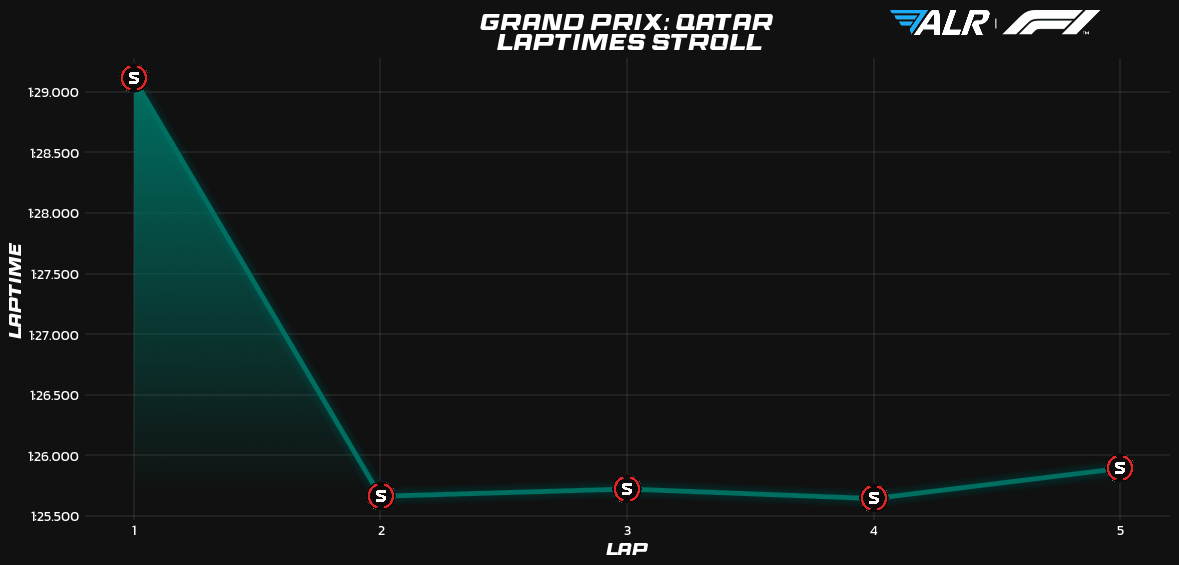

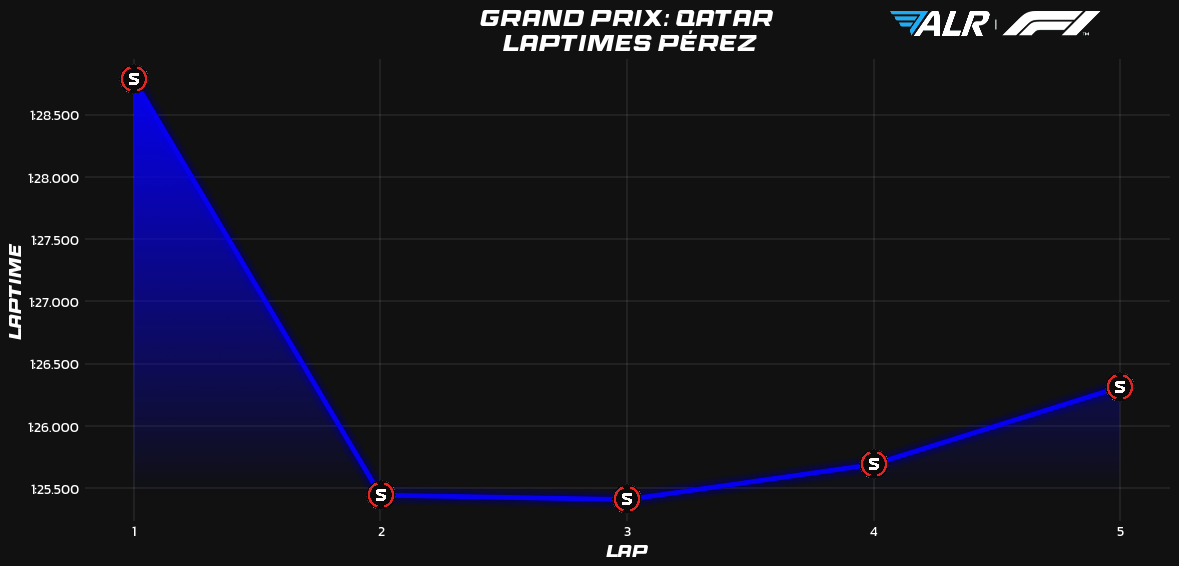

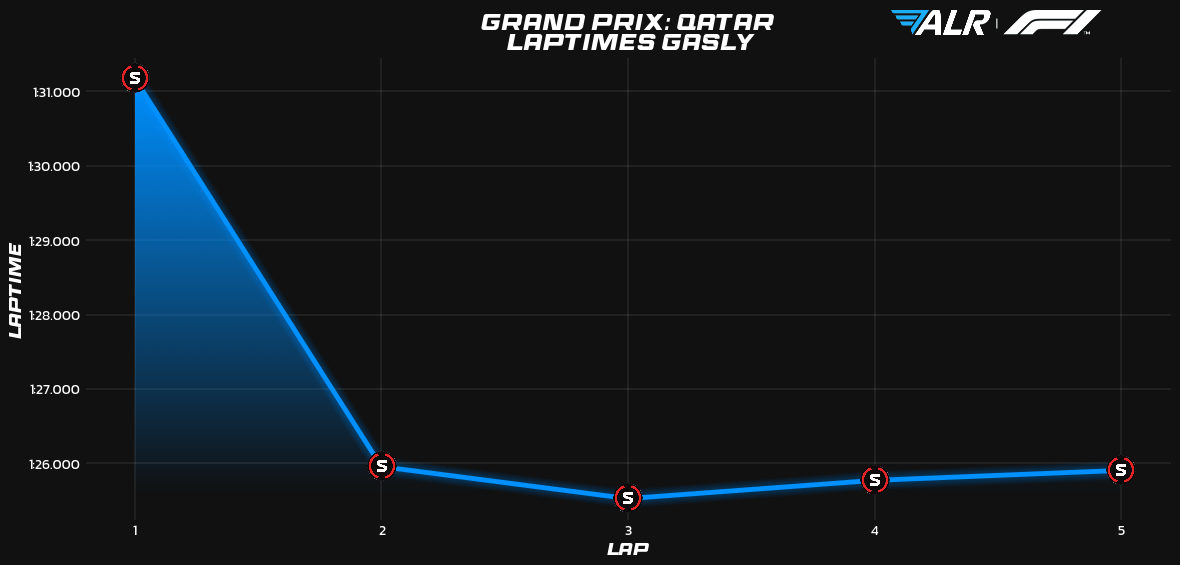

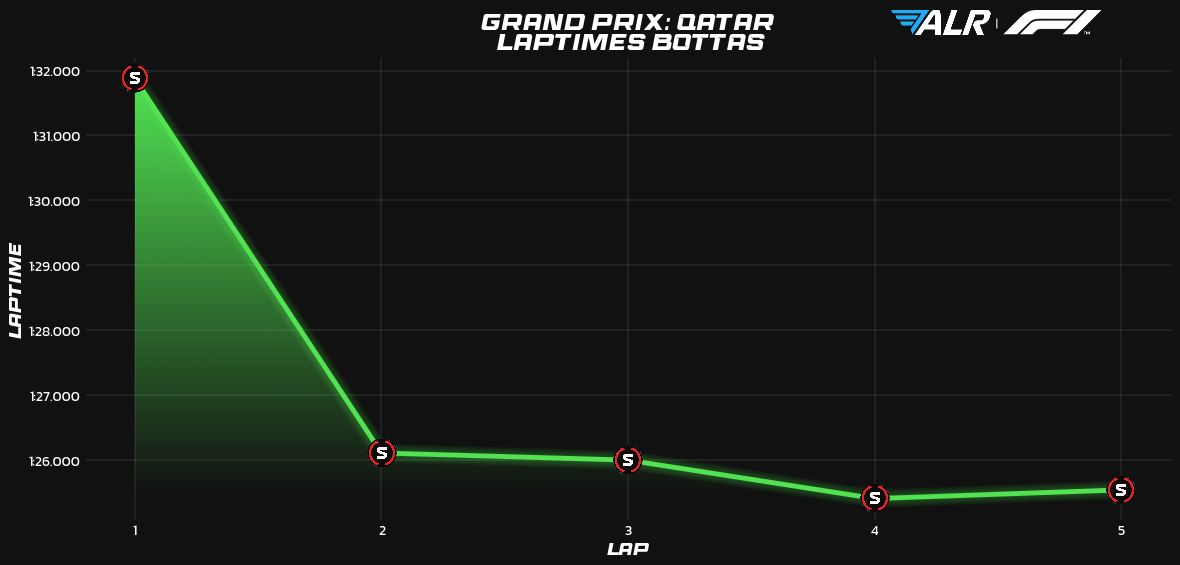

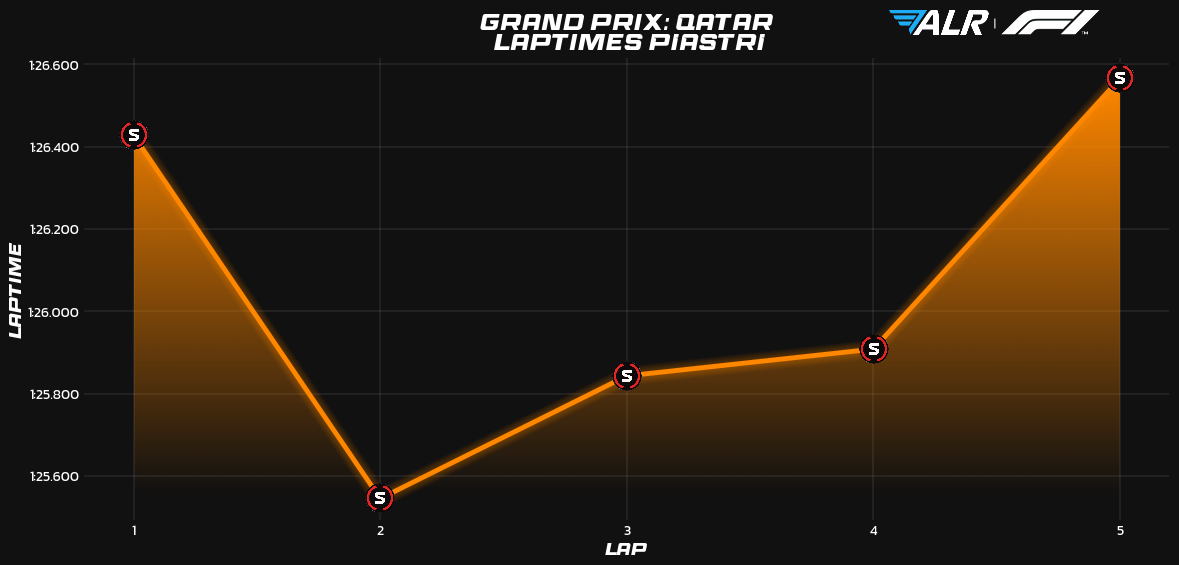

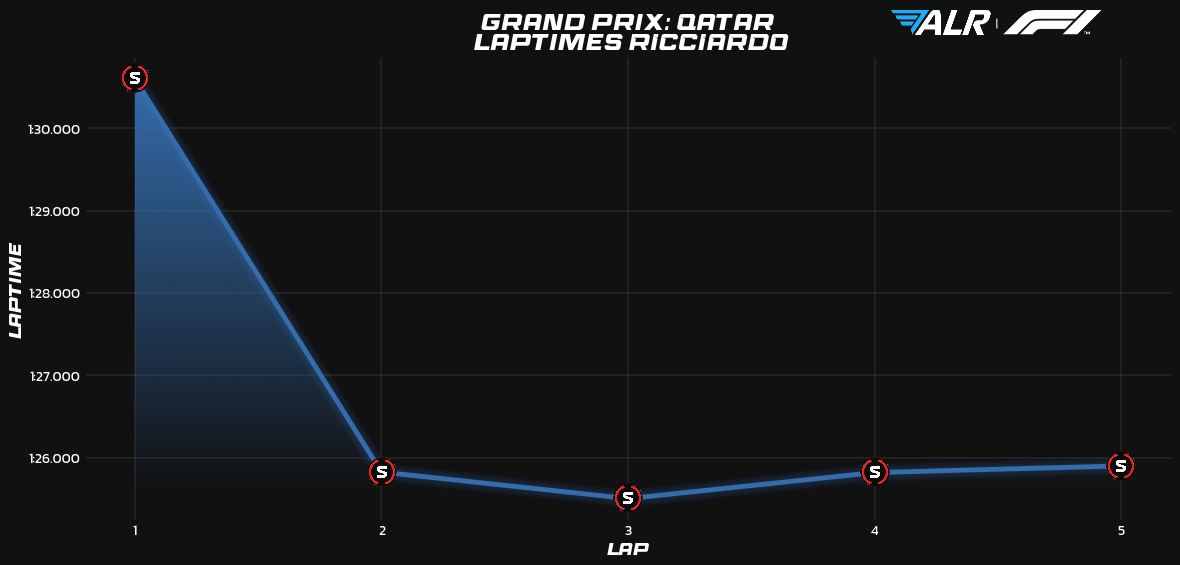

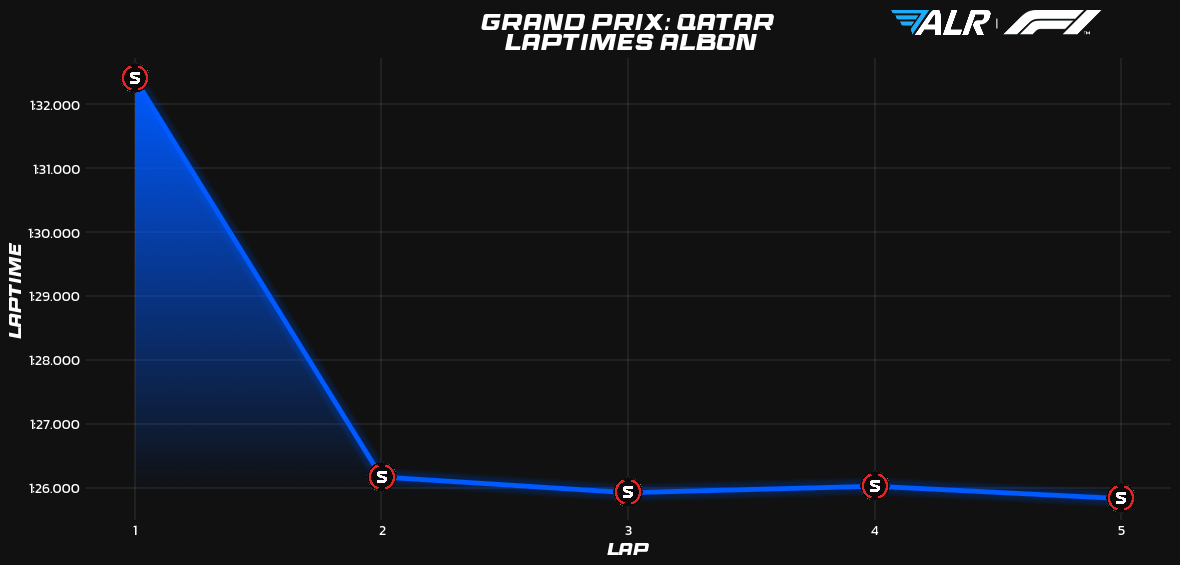

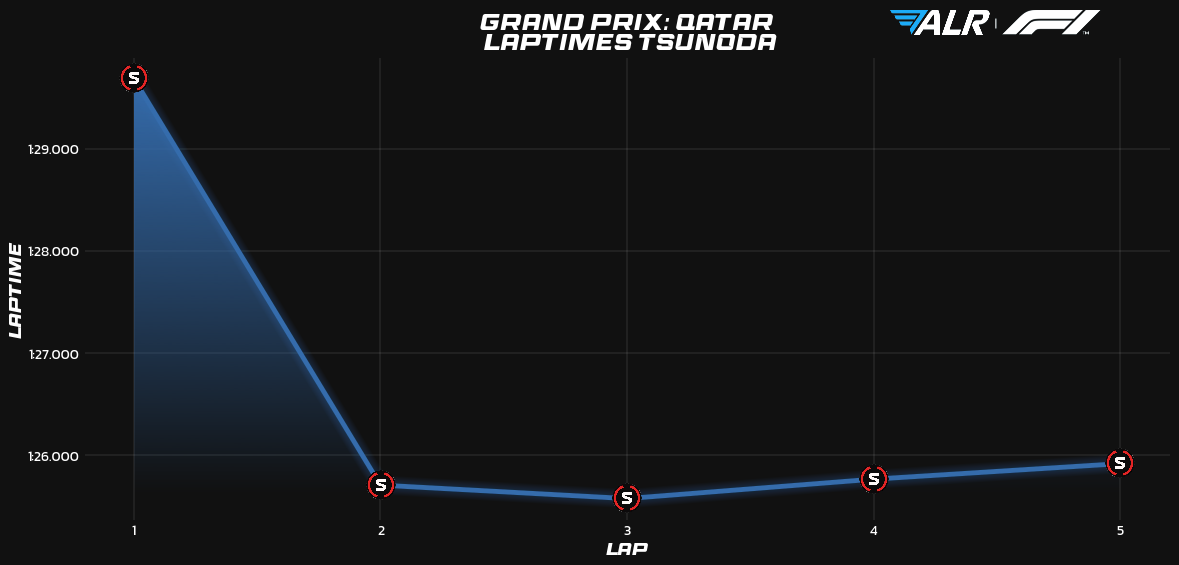

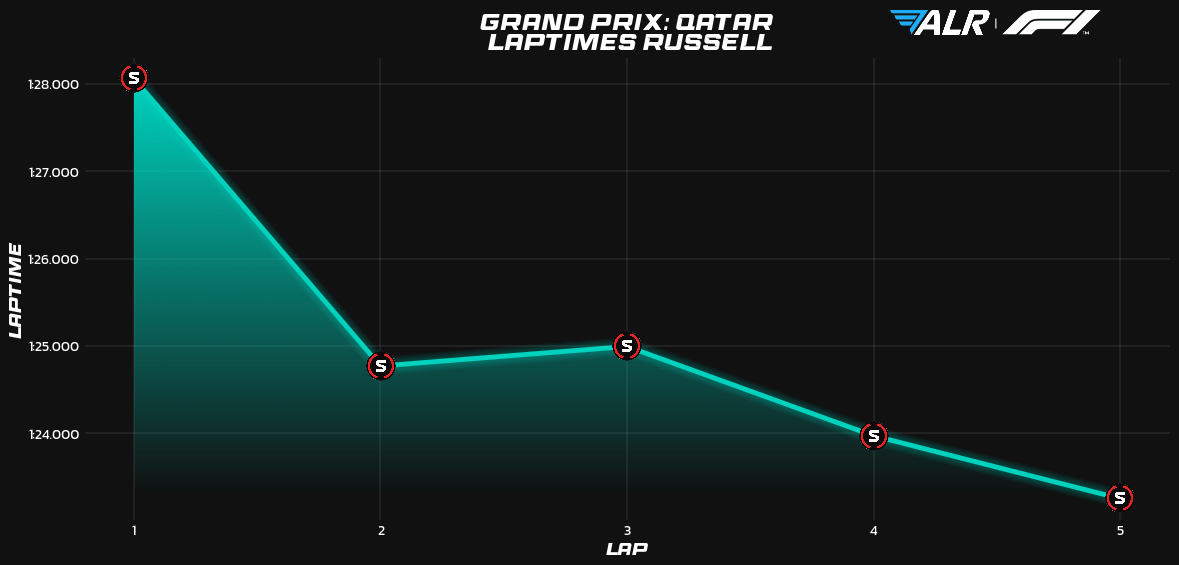

In [104]:
total_lap_times, total_tyres, total_drivers, total_teams, total_means = [], [], [], [], []

outliers_included = False

for driver_id in driver_data:
    lap_times = driver_data[driver_id].lap_times
    lap_times = get_lap_times(lap_times)

    

    if len(lap_times) == 0:
        continue

    team = driver_data[driver_id].team
    name = driver_data[driver_id].name
    track = session_data.track

    total_drivers.append(name)
    total_teams.append(team)

    tyre_stints_visual = [configs['compounds'][str(tyre)] for tyre in driver_data[driver_id].classification_data.get('tyres_visual', []) if tyre != 0]
    tyre_stints_end_laps = [laps for laps in driver_data[driver_id].classification_data.get('tyres_end_laps', []) if laps != 0]
    tyre_stints_end_laps[-1] = driver_data[driver_id].classification_data.get('laps_driven', 0)
    tyre_stints = [tyre_stints_end_laps[0]] + [(tyre_stints_end_laps[i] - tyre_stints_end_laps[i - 1]) for i in range(1, len(tyre_stints_end_laps))]

    if not outliers_included:

        driver_lap_times = remove_slow_laps(lap_times, tyre_stints_end_laps, tyre_stints_visual, tyre_stints)
        total_lap_times.append(driver_lap_times)
        #total_means.append(format_laptime(round(np.mean(driver_lap_times))))

    individual_plot(lap_times, team, name, track, tyre_stints_visual, tyre_stints)

 

In [135]:
def boxplot_plot(lap_times, drivers, teams, means, track):

    plt.style.use('cyberpunk')

    fig, ax = plt.subplots(figsize=(28, 10))
    bp = ax.boxplot(lap_times, vert=True, showmeans=True, meanline=True, labels=drivers, showfliers=False, patch_artist=True,
                        flierprops={'marker': 'o', "markerfacecolor": "white"},
                        medianprops={'color': 'white', 'linewidth': 0},
                        meanprops={'color': 'white'},
                        whiskerprops={'color': 'white', 'linewidth': 2},
                        capprops={'color': 'white', 'linewidth': 2}
                        )

    ax.set_title(f"grand prix: {track}\n laptimes", fontdict={"color": "white", "fontsize": 16, "font": race_font})
    ax.set_xlabel("lap", fontdict={"color": "white", "fontsize": 12, "font": race_font})
    ax.set_ylabel("laptime", fontdict={"color": "white", "fontsize": 12, "font": race_font})

    ax.set_facecolor("#111111") #212121
    fig.set_facecolor("#111111") #111111

    ax.tick_params(axis='x', labelsize=10, colors='White')
    ax.tick_params(axis='y', labelsize=10, colors='White')

    ax.spines['bottom'].set_color('white')
    ax.spines['top'].set_color('White') 
    ax.spines['right'].set_color('White')
    ax.spines['left'].set_color('White')

    for idx, box in enumerate(bp['boxes']):
            box.set(facecolor="white", edgecolor="black", linewidth=2)
            box.set(facecolor = configs['team_color'][teams[idx]])

    old_labels = [ticks.get_text() for ticks in ax.get_yticklabels(which="major")]
    new_labels = [format_laptime(int(old_label)) for old_label in old_labels]
    old_labels = [int(old_label) for old_label in old_labels]

    ax.set_yticks(old_labels, new_labels)
    #ax.set_xticks(range(len(lap_times)))

    plt.xticks(fontproperties=kanit_font)
    plt.yticks(fontproperties=kanit_font)

    ax.grid(which='major', color='white', linewidth=0.1)

    #mplcp.make_lines_glow()
    mplcp.add_gradient_fill()

    #Add image to top-right corner
    newax = fig.add_axes([0.7, 0.77, 0.1, 0.15], anchor='NE', zorder=1)
    newax.imshow(ALR_LOGO)
    newax.axis('off')

    # for i, lap_time in enumerate(lap_times):
    #     if i > 2:
    #         ab = AnnotationBbox(OffsetImage(medium_tye_img, zoom=0.045), (i, lap_time), frameon=False)
    #     else:
    #         ab = AnnotationBbox(OffsetImage(soft_tye_img, zoom=0.045), (i, lap_time), frameon=False)
    #     ax.add_artist(ab)

    plt.show()

/Users/mitchlobbes/opt/anaconda3/envs/F1/lib/python3.10/site-packages/mplcyberpunk/core.py:186: UserWarning: Attempting to set identical low and high xlims makes transformation singular; automatically expanding.
  im = ax.imshow(z,
/Users/mitchlobbes/opt/anaconda3/envs/F1/lib/python3.10/site-packages/mplcyberpunk/core.py:172: RuntimeWarning: divide by zero encountered in divide
  moment = lambda y : (scaler(y)-scaler(ya)) / (scaler(yb)-scaler(ya))
/Users/mitchlobbes/opt/anaconda3/envs/F1/lib/python3.10/site-packages/mplcyberpunk/core.py:172: RuntimeWarning: invalid value encountered in divide
  moment = lambda y : (scaler(y)-scaler(ya)) / (scaler(yb)-scaler(ya))
/Users/mitchlobbes/opt/anaconda3/envs/F1/lib/python3.10/site-packages/mplcyberpunk/core.py:186: UserWarning: Attempting to set identical low and high ylims makes transformation singular; automatically expanding.
  im = ax.imshow(z,


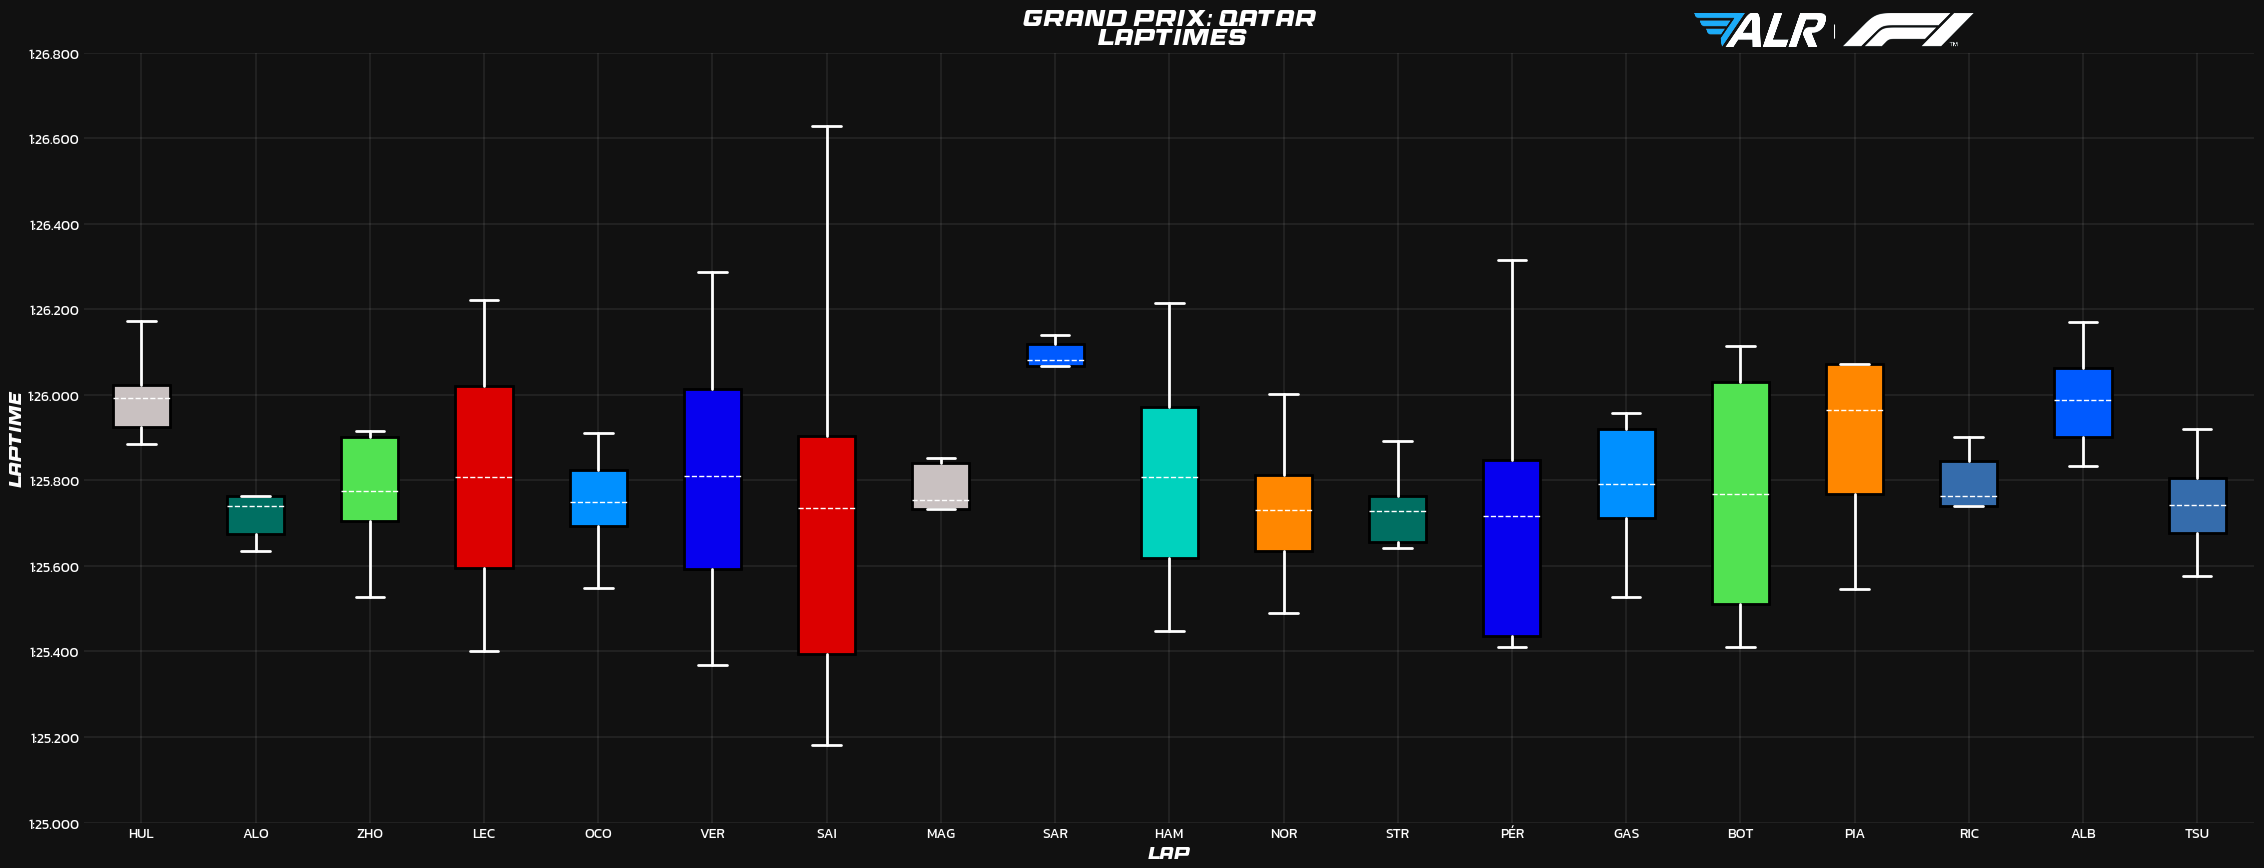

In [136]:
total_drivers =[driver[0:3] for driver in total_drivers]

boxplot_plot(total_lap_times[:-1], total_drivers[:-1], total_teams[:-1], total_means[:-1], track)
